# 2) flat torus billard case 

## a) what is a torus ? 

In geometry, a torus is a surface of revolution generated by revolving a circle in three-dimensional space about an axis that is coplanar with the circle.
Torus represnetaion: the code of the torus plot was found on the internet, we only made some modifications that helped plotting the torus on a TKinter window and adding a toolbar to show all the faces of the torus.

In [1]:
import numpy as np
from tkinter import* 
import matplotlib
matplotlib.use('TkAgg')

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
 
root = Tk()
 
#fig = plt.figure()
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = 0.9, 1.
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)
# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color = 'g', rstride = 1, cstride = 1)
plt.axis('off')
plt.show()
#plt.draw()
canvas = FigureCanvasTkAgg(fig, master=root)
plot_widget = canvas.get_tk_widget()
plot_widget.grid(row=0, column=0)
#tk.Button(root,text="Update",command=update).grid(row=1, column=0)
def close_window():
    root.destroy()

button = TK.Button(text = "Click and Quit",command = close_window)
button.pack()

root.mainloop()

TclError: can't invoke "canvas" command: application has been destroyed

## b) flat torus billard animation 

What is a flat torus? It is a square whose sides correspond two by two. This means that to be imaginary living in this square, each time it is sorted by the upper side it is immediately reappeared by the lower side, the same for the right and left sides.

In [ ]:
from tkinter import* 
import math
from random import randrange


# initialisation of a basic window with minimize button ...

angle = 0
speed = 20
WIDTH = 500
HEIGHT = 500
X1rec = WIDTH/2 - 20
Y1rec = HEIGHT/2 - 20
X2rec = X1rec + 20
Y2rec = Y1rec + 20
X1Line = 0
Y1Line = 0
X2Line = 0
Y2Line = 0
Name = str()
test = "v,h"
button = False
## calculate the coorrdenate of the pool stick
def calculateLinePosition():
    global X1Line
    X1Line = X1rec +(X2rec - X1rec)/2
    global Y1Line
    Y1Line = Y1rec +(Y2rec - Y1rec)/2
    global X2Line
    X2Line = X1Line + 100*math.sin(angle*math.pi/180)
    global Y2Line
    Y2Line = Y1Line + 100*math.cos(angle*math.pi/180)

    
calculateLinePosition()

def evaluateimpact():
    global Name 
   
    
    if  Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT-60 :#when the ball hits the downside side 
        Name=Name+ test[2] 
    
    if  X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH-40 :#when the ball hits the rightside side
        Name=Name+ test[0]
    
evaluateimpact()



root = Tk()#creating and openning a window
root.title("Billard Simulation")
root.geometry("800x600")#size of the window 
#creatin a frame for the buttons in th bottom

bottomFrame=Frame(root)
bottomFrame.pack(side=BOTTOM)

#giv a name to our window

thelabel=Label(root,text="flat Torus case billard simulation") 
thelabel.pack()

#creating buttons (pause and restart buttons )
def pause(event):#function of the button 
    global button
    button = False
    
Pause=Button(bottomFrame,text="Pause",fg="Blue")
Pause.bind(" <Button-1>",pause)
Pause.pack(fill=X)
def Start(event):#function of the button
    global button
    button = True
restart=Button(bottomFrame,text="Start",fg="Green")
restart.bind("<Button-1>",Start)
restart.pack(fill=X)

#creating entries ( angle)

label1=Label(root,text="please choose an angle to start with then press enter")#title of the entry
label1.pack()

#obtaining data from our entry  

def evaluateangle(event):
    print("Evaluatin angle " )
    global angle
    
    
    entry = entrySpace.get()
    if entry :
        angle = float(entry)
        ans.configure(text="Your angle is " +str(angle))
        ans.pack()
        calculateLinePosition()
        canvas.delete('all')
        canvas.create_rectangle(0, 0, WIDTH, HEIGHT,fill="Green",outline='Brown')
        canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
        canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
        canvas.pack()
    
entrySpace=Entry(root)#creating an entry space    
entrySpace.bind("<Return>",evaluateangle)
entrySpace.pack()
ans=Label(root)
ans.configure(text="Your initial angle is " +  str(angle))
ans.pack()


canvas=Canvas(root,width=WIDTH,height=HEIGHT)
canvas.pack()
canvas.create_rectangle(0,0,WIDTH,HEIGHT,fill="Green",outline="brown")
canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
#canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
canvas.pack()
def refresh():
    if(button):
        global X1rec
        global X2rec
        global Y1rec
        global Y2rec
        global speed
        global angle
        global HEIGHT
        global WIDTH
        global Name
        global v 
        global h
        angle=angle%360
       
        X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)
        X2rec = X1rec + 20
       
        Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)
        Y2rec = Y1rec + 20
        if  Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT - 60:
            Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)-500
            Y2rec = Y1rec + 20
        if  Y1rec - float(speed)*math.cos(angle*math.pi/180) <=0:
            Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)+500
            Y2rec = Y1rec + 20
        if  X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH - 20:
            X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)-500
            X2rec = X1rec + 20
        if  X1rec - float(speed)*math.sin(angle*math.pi/180) <=0:
            X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)+500
            X2rec = X1rec + 20
        ans.configure(text="Your angle is " +str(angle))
        ans.pack()
        calculateLinePosition()
        #canvas.delete('all')
        canvas.create_rectangle(0, 0, WIDTH, HEIGHT, fill="Green",outline="brown")
        canvas.create_oval(X1rec, Y1rec, X2rec, Y2rec , width = 0, fill = 'blue')
        #canvas.create_line(X1Line, Y1Line, X2Line, Y2Line, width= 2,fill = 'brown')
        canvas.pack()
        
    
    canvas.after(100,refresh)
    evaluateimpact()
    ans.configure(text="The result name is" +  str( Name))
    ans.pack()
canvas.after(1,refresh)
root.mainloop()#to maintain the window open
print(angle)
if  len(Name)<2000:
    print(Name)



##### statistics  
V=0 #number of the letter v in the name 
H=0 #number of the letter H in the name
for i in range(len(Name)):
    if Name[i]=='v':
        V=V+1
    else :
        H=H+1
data=[angle,V,H]
print(data)

Evaluatin angle 
Evaluatin angle 
Evaluatin angle 
Evaluatin angle 


## c) statistics on a multipule simulations

Even if the sides in a flat torus square are absurd we decided to concider them realy existing in order to make some simple statistics, so to  extract more data from our simulation, we are going to change the code above, keeping only the movement conditions and our impact result 

In [4]:
import math
from random import randrange
import numpy as np
angle=360
speed = 20
WIDTH = 500
HEIGHT = 500
X1rec = WIDTH/2 - 20
Y1rec = HEIGHT/2 - 20
X2rec = X1rec + 20
Y2rec = Y1rec + 20
X1Line = 0
Y1Line = 0
X2Line = 0
Y2Line = 0
Name = str()
test = "v,h"
def refresh(angle):
        global X1rec
        global X2rec
        global Y1rec
        global Y2rec
        global speed
        global HEIGHT
        global WIDTH
        global Name
        global v 
        global h
        global data
        while  len(Name)<2000:
       
            X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)
       
            Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)
        
            if  Y1rec - float(speed)*math.cos(angle*math.pi/180) > HEIGHT - 60:
                Name=Name+ test[2]
                Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)-500
            if  Y1rec - float(speed)*math.cos(angle*math.pi/180) <=0:
                Name=Name+ test[2]
                Y1rec = Y1rec - float(speed)*math.cos(angle*math.pi/180)+500
            if  X1rec - float(speed)*math.sin(angle*math.pi/180) > WIDTH - 20:
                Name=Name+ test[0]
                X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)-500
            if  X1rec - float(speed)*math.sin(angle*math.pi/180) <=0:
                Name=Name+ test[0]
                X1rec = X1rec - float(speed)*math.sin(angle*math.pi/180)+500
            V=0 #number of the letter v in the name 
            H=0 #number of the letter H in the name
            for i in range(len(Name)):
                    if Name[i]=='v':
                        V=V+1
                    else :
                        H=H+1
            data=[angle,V,H]
        print(data)
       


  
refresh(angle)

[360, 0, 2001]


we will start collecting data by changing the angle 

In [5]:
D=np.array([[30, 299, 1701],[45, 478, 1522],[60, 489, 1511],[90, 2000, 0],[120, 488, 1512],[180, 0, 2000],[220, 723, 1277],[280, 652, 1348],[320, 723, 1278],[360, 0, 2000]])
D

array([[  30,  299, 1701],
       [  45,  478, 1522],
       [  60,  489, 1511],
       [  90, 2000,    0],
       [ 120,  488, 1512],
       [ 180,    0, 2000],
       [ 220,  723, 1277],
       [ 280,  652, 1348],
       [ 320,  723, 1278],
       [ 360,    0, 2000]])

After we gathered the number of the letter 'v', and the number of the letter 'h' in different impact name results of different angles, now we can make some simple statistic tests on our data. 

In [33]:
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt

In [31]:
df=pd.DataFrame(D,columns=['angle','v','h'],)#.set_index('angle')
df

,angle,v,h
0,30,299,1701
1,45,478,1522
2,60,489,1511
3,90,2000,0
4,120,488,1512
5,180,0,2000
6,220,723,1277
7,280,652,1348
8,320,723,1278
9,360,0,2000


In order to see the correlation of the angle whith the result name we will create a correlation matrix 

In [40]:
corrmatrix=df.corr()
corrmatrix

,angle,v,h
angle,1.000000,-0.208377,0.208634
v,-0.208377,1.000000,-1.000000
h,0.208634,-1.000000,1.000000


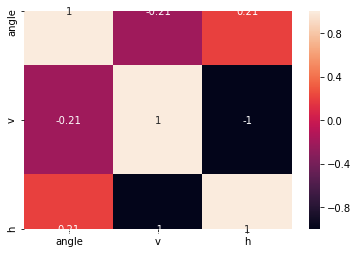

In [38]:
sn.heatmap(corrmatrix, annot=True)
plt.show()